# **CSE47201 Computer Vision Programming Assignment 1**
## Problem 3

### Import library

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import math

/mnt/d/kurone/UNIST/5thSemester/Computer_Vision/Assignment1/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Lock and Hack definitation

In [2]:
class DoorLock(nn.Module):
    def __init__(self):
        super().__init__()
        self.f = nn.Sequential(
            nn.Linear(100, 1),
            nn.Sigmoid()
        )
        for p in self.f.parameters():
            p.requires_grad = False
    
    def forward(self, x):
        y = self.f(x)
        if(y > 0.9):
            print('Opened!')
        return y

In [3]:
class DoorHack(nn.Module):
    def __init__(self, locker):
        super().__init__()
        self.number_of_tries = 0
        self.g = nn.Sequential(
            nn.Linear(100, 100),
        )
        for p in self.g.parameters():
            p.requires_grad = False
        self.locker = locker
        
    def forward(self, z):
        y = self.locker(self.g(z))
        self.number_of_tries += 1
        return y

### Create a hacker class

In [ ]:
# Door hacker
class Hacker():

    # Constructor
    # locker=the lock
    # num_trials=maximum number of tries
    # lr=learning rate
    def __init__(self, locker, num_trials=50, lr=1):
        # Define a DoorHack instance
        self.hacker = DoorHack(locker)

        # Define L1 Loss function, i.e., L = |Y_hat - 1|
        self.loss_fn = nn.L1Loss()

        # Initially, the input z = [0, 0, 0, ..., 0]
        self.z = torch.tensor(np.array([0 for i in range(100)]).astype(np.float32), requires_grad=True)

        # Highest possible value of output
        self.y_true = torch.tensor(np.array([1]).astype(np.float32), requires_grad=True)

        # Setting up Hyperparameter
        self.NUM_TRIALS = num_trials
        self.LEARNING_RATE = lr

        # List to store outputs to visualize
        self.y_list = []
        
    # Hacking attempt
    def hack(self):
        # Tries
        for epoch in range(self.NUM_TRIALS):
            # Get the output
            y = self.hacker(self.z)

            # Compute the loss
            loss = self.loss_fn(y, self.y_true)

            # Backpopagation to compute gradient
            loss.backward()

            # Modify the input with gradient descent
            with torch.no_grad():
                self.z -= self.z.grad * self.LEARNING_RATE
                self.y_list.append(y.detach().numpy()[0])

    # Return the output of DoorLock with input z
    def get(self):
        with torch.no_grad():
            return self.hacker(self.z)
    
    # Visualize the outputs
    def plot(self):
        plt.plot(self.y_list)

### Start hacking

In [5]:
hacker = Hacker(DoorLock())
hacker.hack()

Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!
Opened!


### Visualize the process

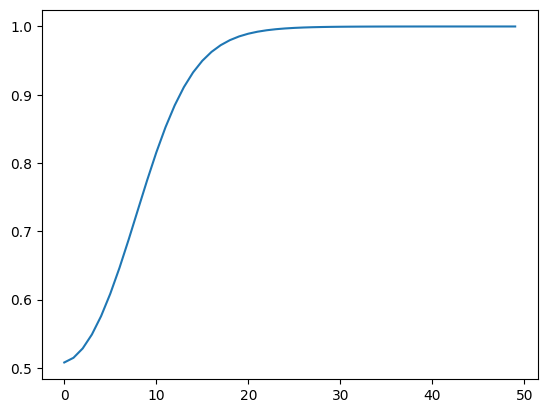

In [6]:
hacker.plot()

### Experiment with 100000 random DoorLocks

#### Redefinition of DoorLock, just remove the print("open")

In [7]:
class DoorLock(nn.Module):
    def __init__(self):
        super().__init__()
        self.f = nn.Sequential(
            nn.Linear(100, 1),
            nn.Sigmoid()
        )
        for p in self.f.parameters():
            p.requires_grad = False
    
    def forward(self, x):
        y = self.f(x)
        return y

#### Experiment

In [8]:
from tqdm import tqdm

# Hack 100000 doors
for i in tqdm(range(100000)):
    # Create new door and start hacking
    hacker = Hacker(DoorLock())
    hacker.hack()

    # If the hacker fails to open the door, break and report
    if hacker.get() <= 0.9:
        print("You failed to unlock!")
        break
else:
    print("Successfuly unlocked 100000 random doors!")

100%|██████████| 100000/100000 [19:44<00:00, 84.42it/s]

Successfuly unlocked 100000 random doors!
